In [1]:
from math import sin, cos, pi
import matplotlib.pyplot as plt

In [9]:
def trajectory(theta, speed=20, height=0, dt=0.01, g=-9.81):
    vx = speed * cos(theta * pi / 180)
    vz = speed * sin(theta * pi / 180)
    t, x, z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [11]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

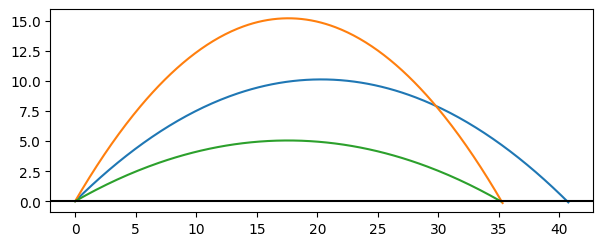

In [13]:
plot_trajectories(trajectory(45), trajectory(60), trajectory(30))

In [14]:
def landing_position(traj):
    return traj[1][-1]

In [16]:
def hang_time(traj):    
    return traj[0][-1]

In [17]:
def max_height(traj):    
    return max(traj[2])

In [15]:
landing_position(trajectory(45))

40.72935059634507

In [19]:
max_height(trajectory(45))

10.123035298172542

In [18]:
hang_time(trajectory(45))

2.8799999999999826

In [23]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx = 20 * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = 20 * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [30]:
def plot_trajectory3d(traj):
    # fig, ax = plt.gcf(), plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

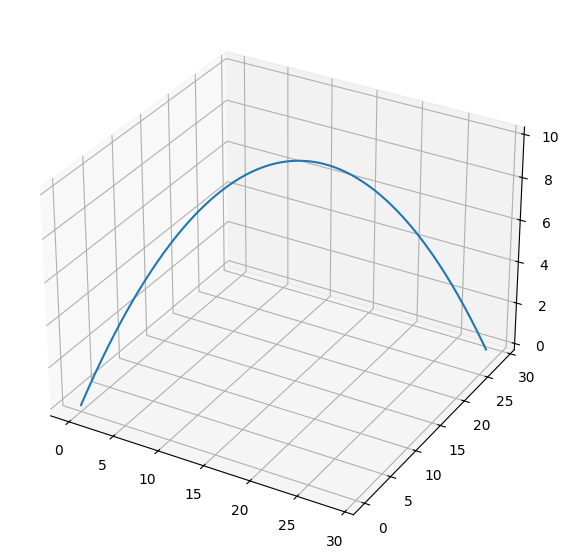

In [34]:
plot_trajectory3d(trajectory3d(45,45))

In [36]:
def flat_ground(x, y):
    return 0

def ridge(x, y):
    return (x**2 - 5*y**2) / 2500

In [39]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81, elevation = flat_ground):
    vx = 20 * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = 20 * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = 20 * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    
    while z >= elevation(x, y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [46]:
import numpy as np
from matplotlib import cm

In [47]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    # fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig = plt.gcf()
    ax = fig.add_subplot(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

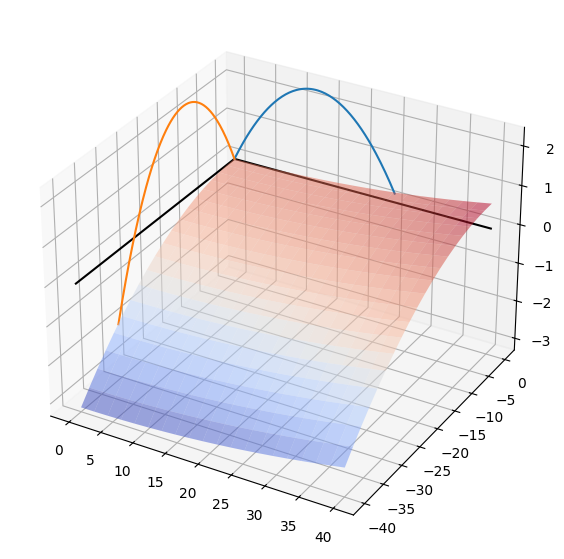

In [48]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

In [50]:
from math import sqrt

B = 0.001 #<1>
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): #<2>
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi): #<3>
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) #<4>
    a = (g/2) - B * vx**2 + C * vy**2 #<5>
    b = vz
    landing_time = -b/a #<6>
    landing_distance = v_xy * landing_time #<7>
    return landing_distance

In [51]:
from helpers import *


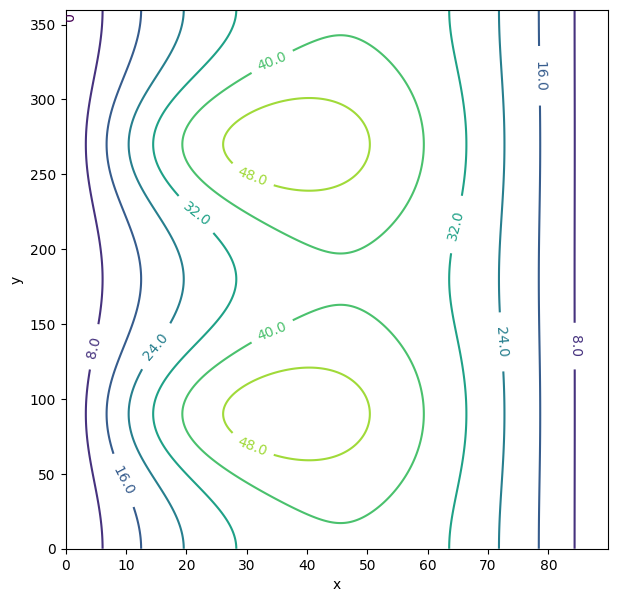

In [52]:
scalar_field_contour(landing_distance,0, 90, 0, 360)

<Figure size 700x700 with 0 Axes>

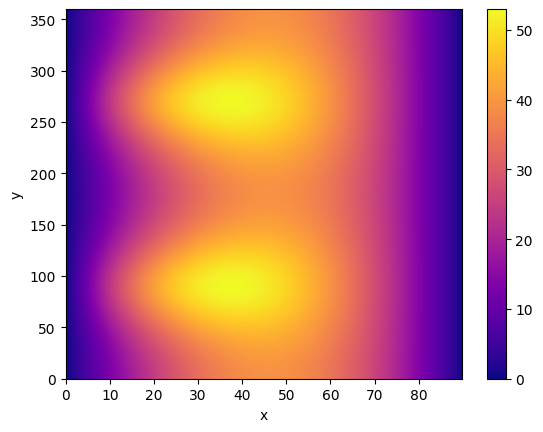

In [53]:
scalar_field_heatmap(landing_distance, 0, 90, 0, 360)

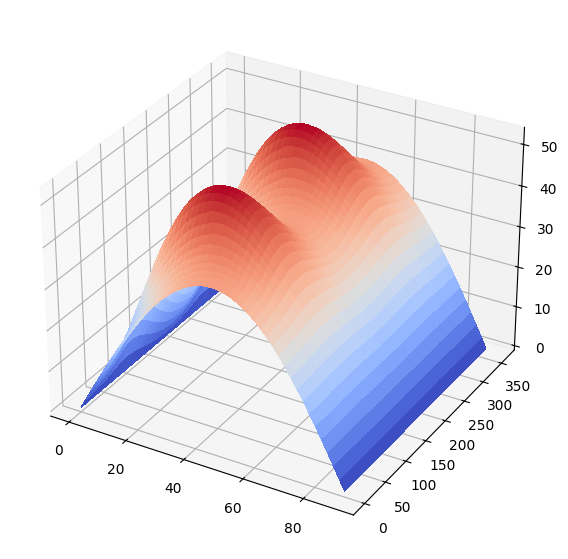

In [54]:
plot_scalar_field(landing_distance, 0, 90, 0, 360)

In [56]:
def scant_slope(f, xmin, xmax):
    return (f(xmax) - f(xmin))/(xmax - xmin)

def approx_derivative(f, x, dx = 1e-6):
    return scant_slope(f, x - dx, x + dx)

def approx_gradient(f, x0, y0, dx = 1e-6):
    partial_x = approx_derivative(lambda x: f(x, y0), x0, dx = dx)
    partial_y = approx_derivative(lambda y: f(x0, y), y0, dx=dx)
    return (partial_x, partial_y)

def landing_distance_gradient(theta, phi):
    return approx_gradient(landing_distance, theta,phi)

In [60]:
landing_distance_gradient(30, 90)

(0.5735458111432762, 0.0)

<Figure size 700x700 with 0 Axes>

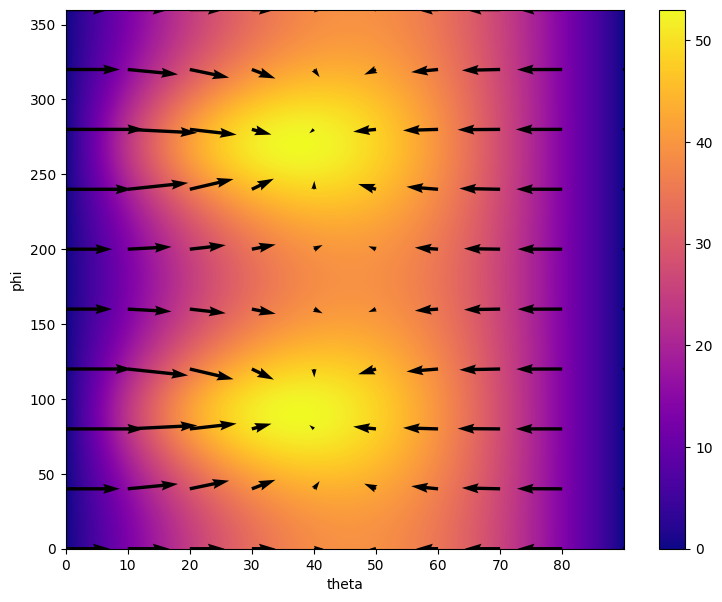

In [61]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

<Figure size 700x700 with 0 Axes>

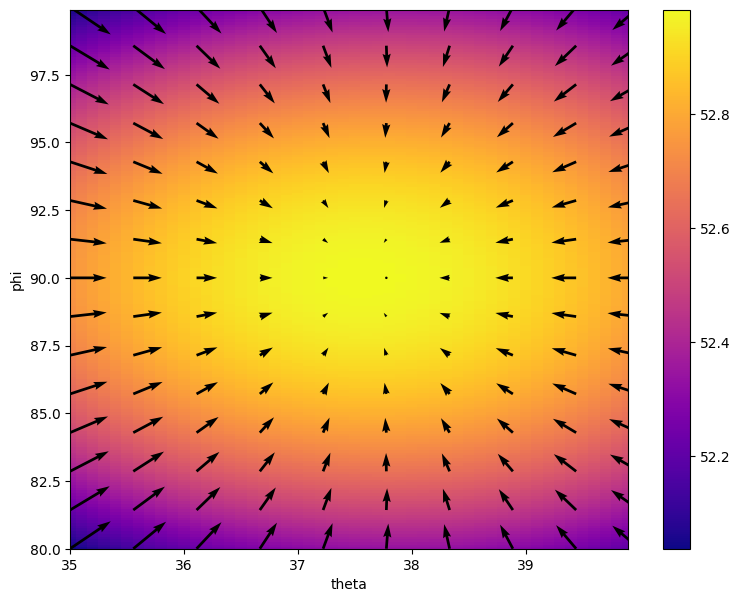

In [62]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

### 12.4.4　实现梯度上升

In [97]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [92]:
gradient_ascent(landing_distance, 36, 83)

(37.581147497815415, 89.99992486365765)

In [93]:
gradient_ascent_points(landing_distance, 36, 83)

([36,
  36.122600166772905,
  36.23613678183598,
  36.34128767809185,
  36.43867739063241,
  36.52888165447432,
  36.6124315718922,
  36.68981737829511,
  36.761491806646426,
  36.827873157008455,
  36.88934820621496,
  36.94627460240018,
  36.99898328084412,
  37.04778056717909,
  37.09295013848762,
  37.134754710841506,
  37.17343771973534,
  37.209224815779,
  37.242325179201714,
  37.27293277751269,
  37.30122753789665,
  37.32737637750078,
  37.3515341520093,
  37.37384461487617,
  37.39444116339493,
  37.41344765582288,
  37.43097907573851,
  37.44714217508273,
  37.46203611009456,
  37.475752960007355,
  37.48837825285044,
  37.49999141309101,
  37.51066622348694,
  37.520471198121705,
  37.529470015835436,
  37.53772181865289,
  37.54528154573854,
  37.552200210508225,
  37.55852524524239,
  37.564300675169065,
  37.569567402680924,
  37.574363413392724,
  37.578723989304095,
  37.5826819290678,
  37.58626765457116,
  37.58950939922984,
  37.592433428256136,
  37.59506410616052

<Figure size 700x700 with 0 Axes>

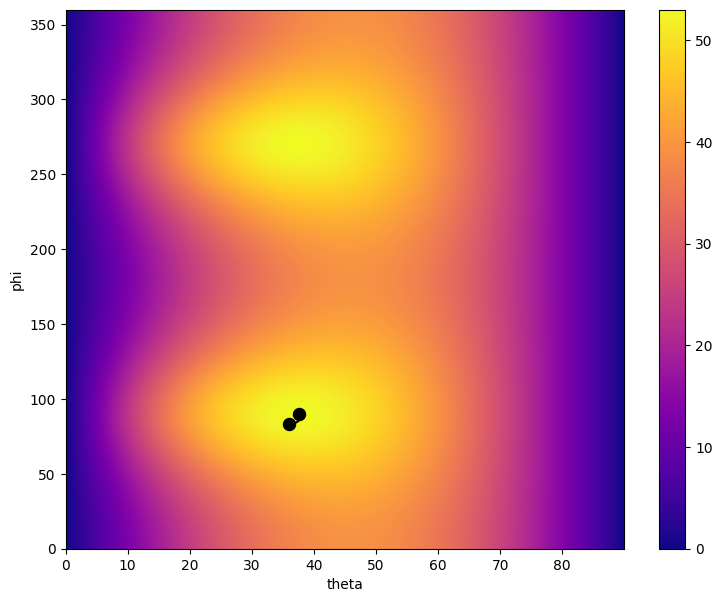

In [70]:
from vectors import to_polar, to_cartesian
# scalar_field_heatmap(landing_distance,35,40,80,100)
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [78]:
gradient_ascent(landing_distance, 10, 10)

(37.58114748917211, 89.9999252640206)

In [82]:
gradient_ascent(landing_distance, 80, 300)

(37.581147511137985, 270.00007384315535)

<Figure size 700x700 with 0 Axes>

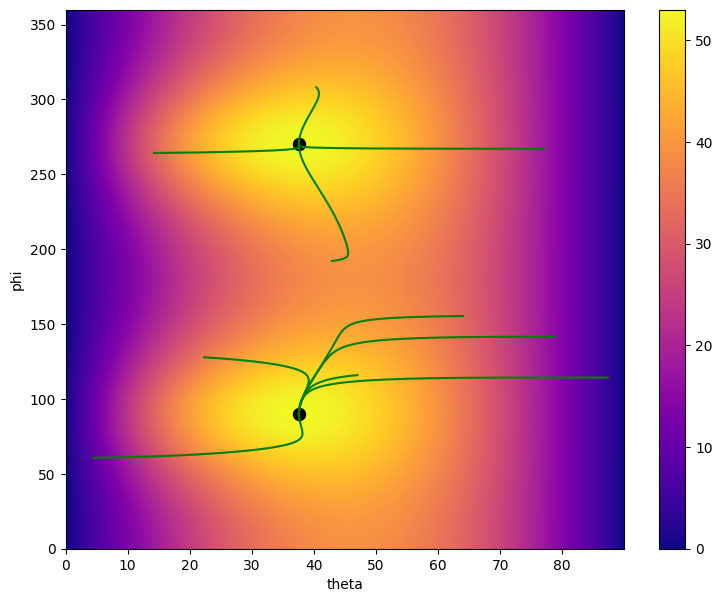

In [120]:
from random import uniform
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.scatter([37.58114751557887, 37.581147511137985],[89.99992616039857, 270.00007384315535],c='k',s=75)
# plt.plot(*gradient_ascent_points(landing_distance,10,10),c='k')
# plt.plot(*gradient_ascent_points(landing_distance,80,300),c='k')
for _ in range(0, 10):
    plt.plot(*gradient_ascent_points(landing_distance,uniform(0, 90),uniform(0, 360)),c='green')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [140]:
def gradient_ascent(f,xstart,ystart,tolerance=1e-6, rate=1):
    tries = 1
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance and tries < 100000 :
        x += grad[0]*rate
        y += grad[1]*rate
        grad = approx_gradient(f,x,y)
        tries +=1
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6, rate=1):
    tries = 1
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance and tries < 100000:
        x += grad[0]*rate
        y += grad[1]*rate
        grad = approx_gradient(f,x,y)
        tries +=1
        xs.append(x)
        ys.append(y)
    return xs, ys

In [134]:
gradient_ascent(landing_distance, 10, 10)

(37.58114748917211, 89.9999252640206)

In [135]:
def gradient_ascent_steps(f, x, y, rate=1):
    gap = gradient_ascent_points(f, x, y, rate=rate)
    print(gap[0][-1], gap[1][-1])
    print('total steps %d' % len(gap[0]))

In [136]:
gradient_ascent(landing_distance, 10, 10, rate=10)

(37.58114745869989, 89.99993099096787)

In [125]:
gradient_ascent_steps(landing_distance, 10, 10, rate=1)

37.58114748917211 89.9999252640206
total steps 1321


In [127]:
gradient_ascent(landing_distance, 10, 10, rate=0.1)

(37.5811475129765, 89.99992478426432)

In [128]:
gradient_ascent_steps(landing_distance, 10, 10, rate=0.1)

37.5811475129765 89.99992478426432
total steps 13241


In [141]:
gradient_ascent_steps(landing_distance, 10, 10, rate=20)

37.58114766617823 89.99994262196319
total steps 63


In [142]:
gradient_ascent_steps(landing_distance, 10, 10, rate=50)

59.89208459493629 89.99999992158165
total steps 100000


<Figure size 700x700 with 0 Axes>

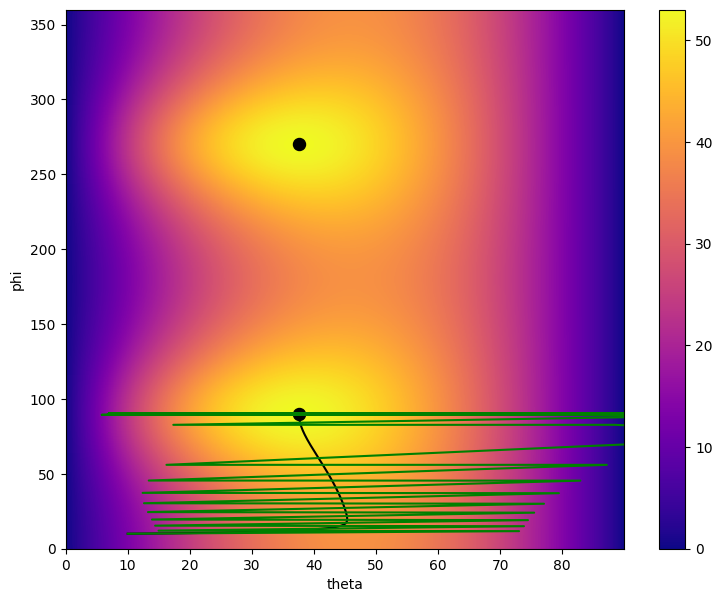

In [143]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.scatter([37.58114751557887, 37.581147511137985],[89.99992616039857, 270.00007384315535],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,10,10),c='k')
plt.plot(*gradient_ascent_points(landing_distance,10,10, rate=50),c='green')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)